In [29]:
import numpy as np
import pandas as pd
import matplotlib.colors as mc
import matplotlib.image as image
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from palettable import cartocolors

([<matplotlib.axis.XTick at 0x25873a24bb0>,
 [Text(1, 0, 'F'),
  Text(2, 0, 'B'),
  Text(3, 0, 'D'),
  Text(4, 0, 'C'),
  Text(5, 0, 'J'),
  Text(6, 0, 'A'),
  Text(7, 0, 'H'),
  Text(8, 0, 'T'),
  Text(9, 0, 'K'),
  Text(10, 0, 'M'),
  Text(11, 0, 'E'),
  Text(12, 0, 'Q'),
  Text(13, 0, 'R'),
  Text(14, 0, 'N'),
  Text(15, 0, 'I'),
  Text(16, 0, 'G'),
  Text(17, 0, 'L'),
  Text(18, 0, 'O'),
  Text(19, 0, 'S'),
  Text(20, 0, 'P')])

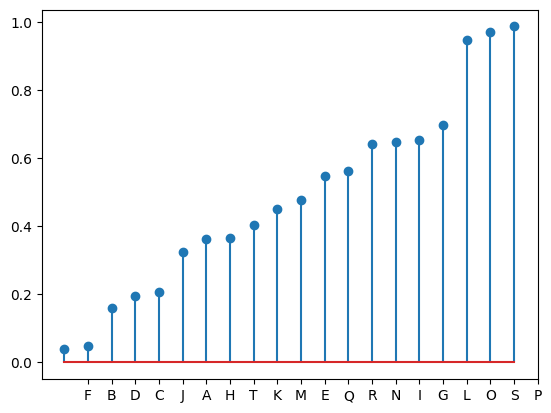

In [30]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 
                   'values':np.random.uniform(size=20) })

ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

plt.stem(ordered_df['values'])
plt.xticks(my_range, ordered_df['group'])

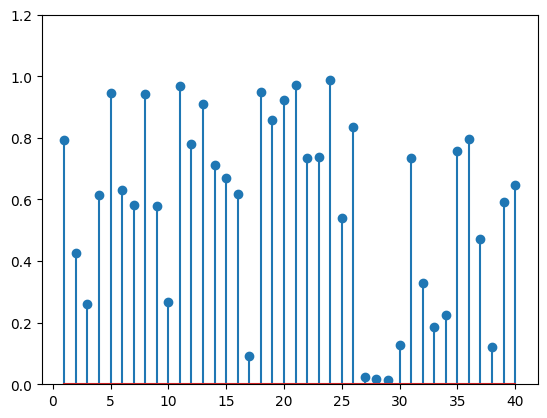

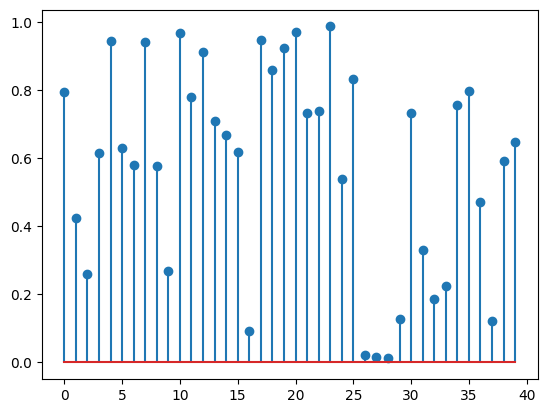

In [31]:
x=range(1,41)
values=np.random.uniform(size=40)
 
plt.stem(x, values)
plt.ylim(0, 1.2)
plt.show()
 
plt.stem(values)
plt.show()

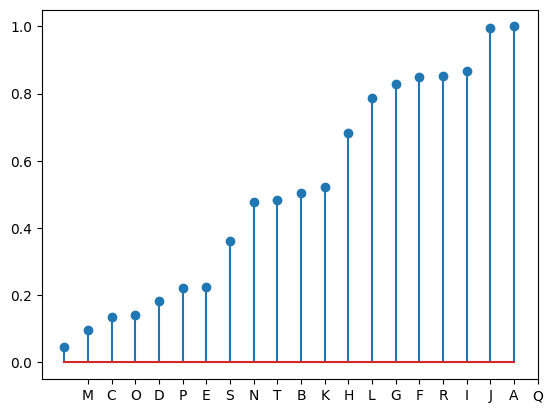

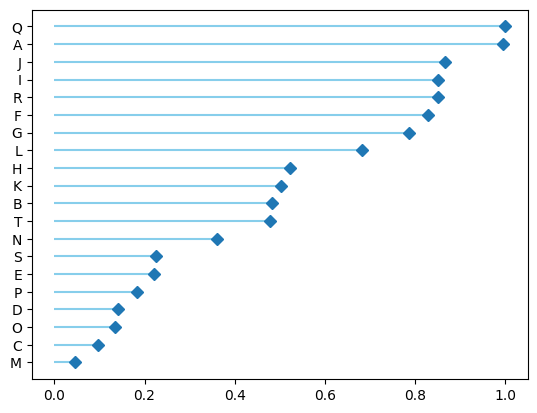

In [32]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])
plt.show()

# 가로는 hlines를 이용
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D")
plt.yticks(my_range, ordered_df['group'])
plt.show()

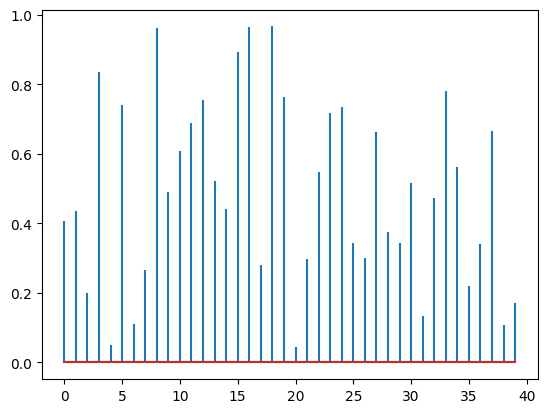

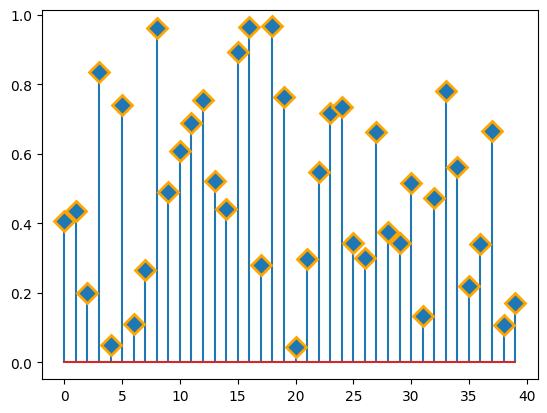

In [33]:
values=np.random.uniform(size=40)

plt.stem(values, markerfmt=' ')
plt.show()
 
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.show()

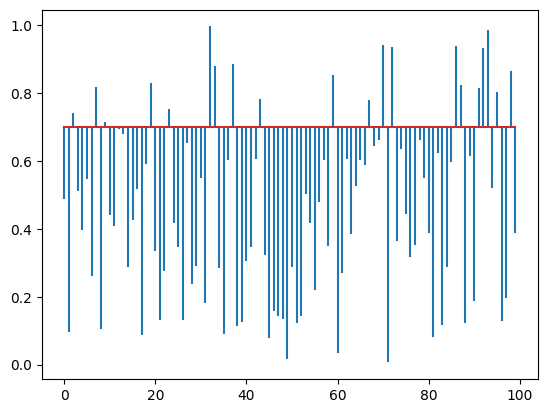

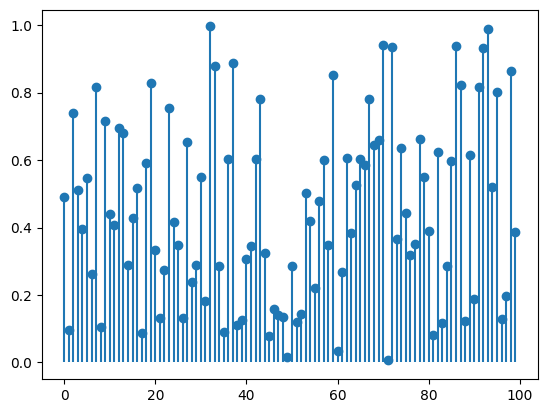

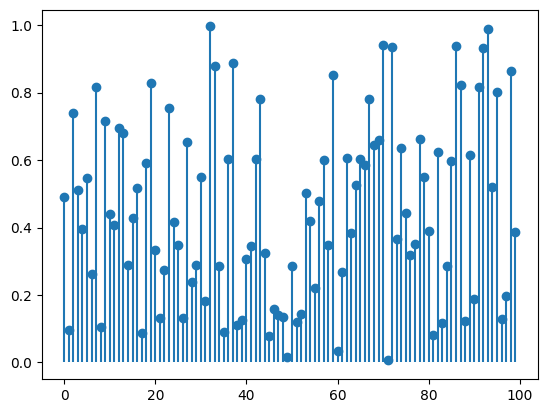

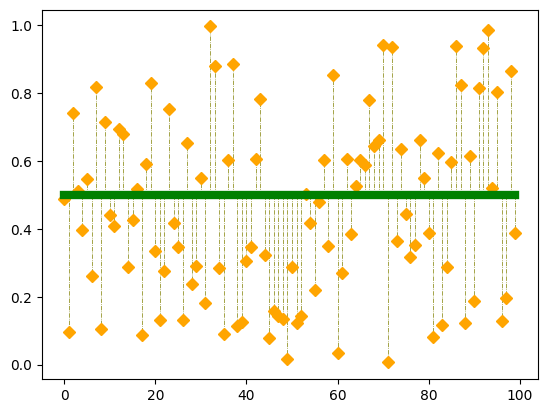

In [34]:
values=np.random.uniform(size=100)

# bottom을 통해 기준점을 만들고 기준점으로부터 값까지 선을 잇는다
plt.stem(values, markerfmt=' ', bottom=0.7)
plt.show()

(markers, stemlines, baseline) = plt.stem(values)
plt.setp(baseline, visible=False) # visible은 빨간선을 보여줄지 유무
plt.show()
 
# 빨간선 지우는 방법 2
plt.stem(values, basefmt=' ')
plt.show()
 
# 베이스라인을 넣고싶다면 plt.stem 안에 bottom으로 넣어야 한다
# stemlines을 변경하고 싶다면 따로 설정해야 한다
(markers, stemlines, baseline) = plt.stem(values, bottom=0.5)
plt.setp(markers, marker = 'D', color="orange", linewidth=.3)
plt.setp(baseline, linestyle="-", color="g", linewidth=6)
plt.setp(stemlines, linestyle="-.", color="olive", linewidth=.5)
plt.show()

In [35]:
ordered_df

,group,values
12,M,0.046634
2,C,0.097949
14,O,0.134365
3,D,0.142047
15,P,0.182559
4,E,0.221301
18,S,0.225262
13,N,0.361799
19,T,0.477169
1,B,0.483421


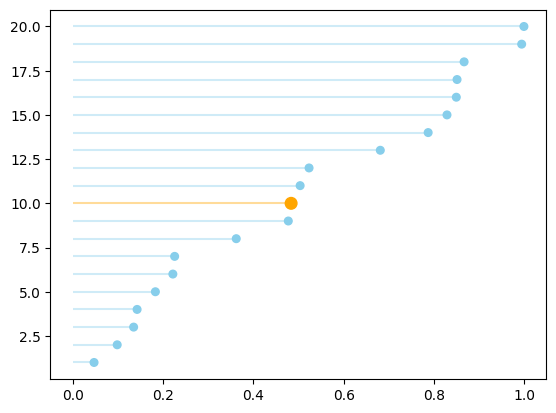

In [36]:
# 그룹이 B면 orange, 아니면 skyblue
my_color=np.where(ordered_df ['group']=='B', 'orange', 'skyblue')
# 그룹이 B면 사이즈가 70 아니면 30
my_size=np.where(ordered_df ['group']=='B', 70, 30)
 

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size, alpha=1)
 
plt.show()

,group,value1,value2
0,A,0.605458,0.735607
1,B,0.206094,0.398531
2,C,0.587436,0.650552
3,D,0.076246,0.098027
4,E,0.443190,0.637039


,group,value1,value2
9,J,0.048821,0.147736
3,D,0.076246,0.098027
14,O,0.104485,0.324260
19,T,0.108142,0.220288
1,B,0.206094,0.398531


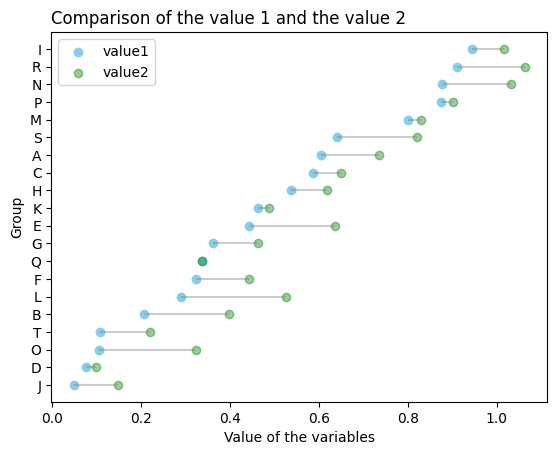

In [37]:
# 예시 df 만들기
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4

# list(map(chr, range(65, 91))) 이건 A-Z임 
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
display(df.head()) 

# value1을 기준으로 정렬
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
display(ordered_df.head())

# hlines을 그리고, scatter로 점들 추가
plt.hlines(y=my_range, 
           xmin=ordered_df['value1'], # min값부터
           xmax=ordered_df['value2'], # max값까지 
           color='grey',              # 색상은 grey
           alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1') # value1의 색깔
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2') # value2의 색깔
plt.legend()
 
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

plt.show()

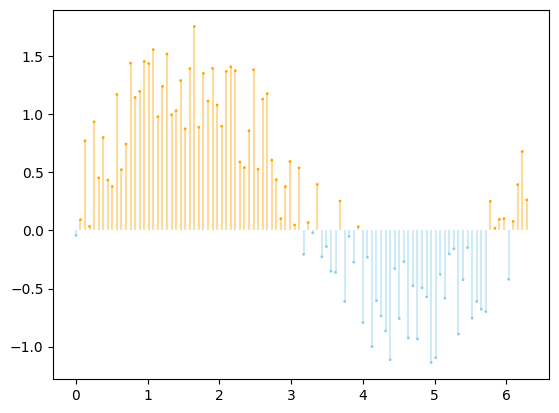

In [38]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.uniform(size=len(x)) - 0.2
 
# 조건걸어 색깔 만들기
my_color = np.where(y>=0, 'orange', 'skyblue')
 
# vlines와 scatter로 꾸미기
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)

plt.show()

In [39]:
df_office = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv")
df_office.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


In [40]:
df_office_avg = df_office.sort_values(["season", "episode"])
df_office_avg["episode_id"] = np.arange(len(df_office_avg)) + 1
df_office_avg["episode_mod"] =  df_office_avg["episode_id"] + (9 * df_office_avg["season"])
df_office_avg = df_office_avg.assign(
    avg = df_office_avg.groupby("season")["imdb_rating"].transform("mean"),
    mid = df_office_avg.groupby("season")["episode_mod"].transform("mean")
)

df_office_avg.head()

,season,episode,title,imdb_rating,total_votes,air_date,episode_id,episode_mod,avg,mid
0,1,1,Pilot,7.6,3706,2005-03-24,1,10,8.016667,12.5
1,1,2,Diversity Day,8.3,3566,2005-03-29,2,11,8.016667,12.5
2,1,3,Health Care,7.9,2983,2005-04-05,3,12,8.016667,12.5
3,1,4,The Alliance,8.1,2886,2005-04-12,4,13,8.016667,12.5
4,1,5,Basketball,8.4,3179,2005-04-19,5,14,8.016667,12.5


In [41]:
df_lines  = df_office_avg.groupby("season").agg(start_x=("episode_mod", min),
                                    end_x=("episode_mod",max),
                                    y=("avg", max) # unique값이 없어서 min or max 등 사용
                                    ).reset_index() 

# 위아래로 + - 5씩 함
df_lines["start_x"] -= 5
df_lines["end_x"] += 5

df_lines = pd.melt(
    df_lines, 
    id_vars=["season", "y"], 
    value_vars=["start_x", "end_x"], 
    var_name="type", 
    value_name="x"
)
df_lines["x_group"] = np.where(df_lines["type"] == "start_x", df_lines["x"] + 0.1, df_lines["x"] - 0.1)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "start_x").values & (df_lines["x"] == np.min(df_lines["x"])).values, 
    df_lines["x_group"] - 0.1, 
    df_lines["x_group"]
)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "end_x").values & (df_lines["x"] == np.max(df_lines["x"])).values, 
    df_lines["x_group"] + 0.1, 
    df_lines["x_group"]
)
df_lines = df_lines.sort_values(["season", "x_group"])

In [42]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [43]:
GREY82 = "#d1d1d1"
GREY70 = "#B3B3B3"
GREY40 = "#666666"
GREY30 = "#4d4d4d"
BG_WHITE = "#fafaf5"

# 9개의 시즌에 각각 할당됨
COLORS = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8","#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890"]
COLORS_DARK = [adjust_lightness(color, 0.8) for color in COLORS]
COLORS_LIGHT = [adjust_lightness(color, 1.2) for color in COLORS]

# 3가지 색상을 각각 3가지 변형으로 총 9개
cmap_regular = mc.LinearSegmentedColormap.from_list("regular", COLORS)
cmap_dark = mc.LinearSegmentedColormap.from_list("dark", COLORS_DARK)
cmap_light = mc.LinearSegmentedColormap.from_list("light", COLORS_LIGHT)

# 정규화
normalize = mc.Normalize(vmin=1, vmax=9)

# 회사로고 - 그냥 엑셈으로 해봄
IMAGE = image.imread("./exem_ci_solid_color.png")

# 수평선 그릴 값 지정
HLINES = [6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

In [44]:
VOTES_MAX = df_office_avg["total_votes"].max()
VOTES_MIN = df_office_avg["total_votes"].min()

# low and high refer to the final dot size.
def scale_to_interval(x, low=15, high=150):
    return ((x - VOTES_MIN) / (VOTES_MAX - VOTES_MIN)) * (high - low) + low

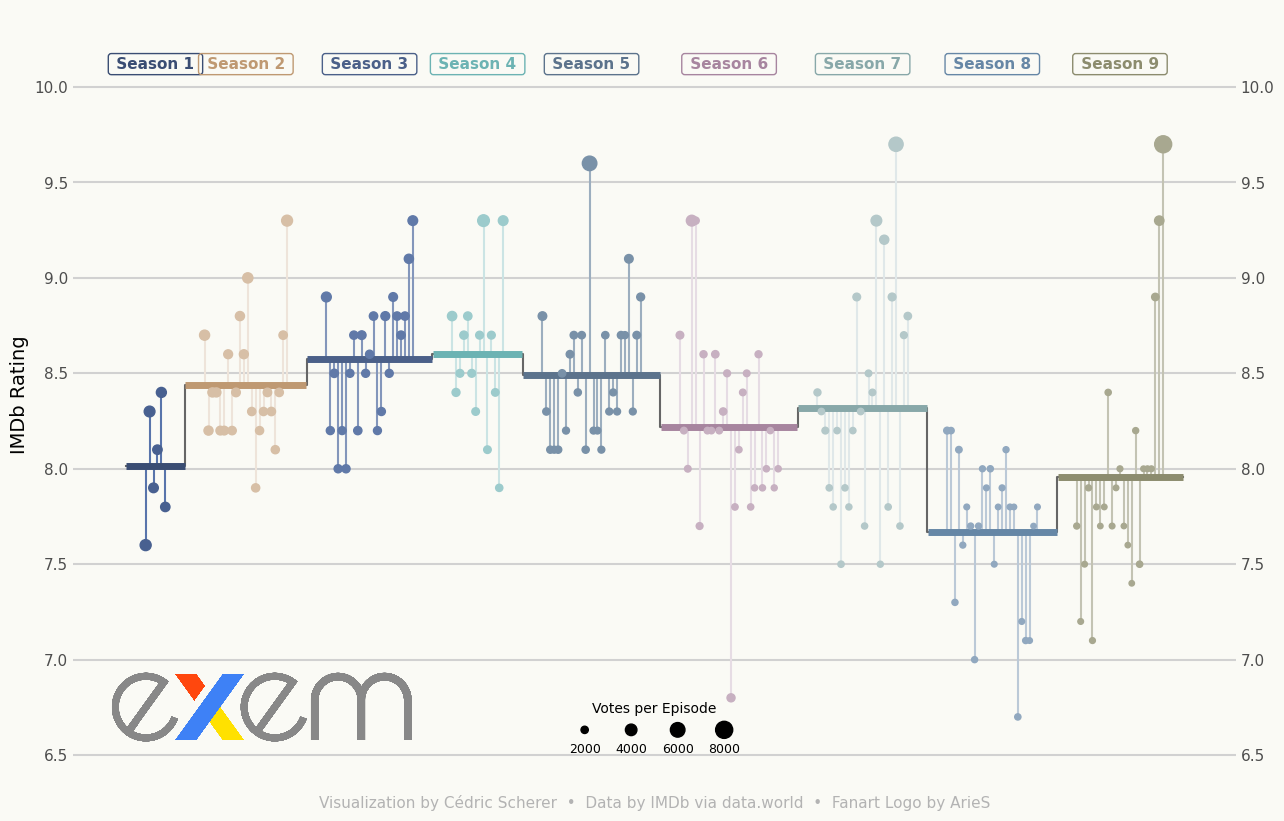

In [45]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# 수평선 그리기
for h in HLINES:
    plt.axhline(h, color=GREY82, zorder=0)

# 값에 따른 수직선 그리기
plt.vlines(
    x="episode_mod", 
    ymin="imdb_rating", 
    ymax="avg",
    color=cmap_light(normalize(df_office_avg["season"])),
    data = df_office_avg
)

plt.plot("x", "y", "-", color=GREY40, data=df_lines)

for season in df_lines["season"].unique():
    d = df_lines[df_lines["season"] == season]
    plt.plot("x_group", "y", "", color=cmap_dark(normalize(season)), lw=5, data=d, solid_capstyle="butt")

# 점들 그리기
plt.scatter(
    "episode_mod", 
    "imdb_rating",
    s = scale_to_interval(df_office_avg["total_votes"]),
    color=cmap_regular(normalize(df_office_avg["season"])), 
    data=df_office_avg,
    zorder=3
)


midpoints = df_office_avg["mid"].unique()
for season, mid in enumerate(midpoints):
    color = cmap_dark(normalize(season + 1))
    plt.text(
        mid, 10.12, f" Season {season + 1} ", 
        color=color,
        weight="bold",
        ha="center",
        va="center",
        fontsize=11,
        bbox=dict(
            facecolor="none", 
            edgecolor=color, 
            linewidth=1,
            boxstyle="round", 
            pad=0.2
        )
    )


ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

plt.tick_params(axis="y", labelright=True, length=0)
plt.yticks(HLINES,fontsize=11, color=GREY30)
plt.ylim(0.98 * 6.5, 10.2 * 1.02)


plt.xticks([], "")
plt.ylabel("IMDb Rating", fontsize=14)
plt.text(
    0.5, -0.03, "Visualization by Cédric Scherer  •  Data by IMDb via data.world  •  Fanart Logo by ArieS", 
    fontsize=11, 
    color=GREY70,
    ha="center", 
    va="center", 
    transform=ax.transAxes # so coordinates are in terms of the axis.
)

# 회사로고 or 워터마크 삽입정도로 생각
ab = AnnotationBbox(
    OffsetImage(IMAGE, zoom=0.1), 
    (1, 6.75), 
    xycoords="data", 
    box_alignment=(0, 0.5),
    pad=0, 
    frameon=False
)

ax.add_artist(ab)

x_pos = [0.44, 0.48, 0.52, 0.56]
votes = [2000, 4000, 6000, 8000]

plt.scatter(
    x_pos, 
    [0.065] * 4, 
    s=scale_to_interval(np.array(votes)), 
    color="black",
    transform=ax.transAxes
)

plt.text(0.5, 0.0875, "Votes per Episode", fontsize=10, ha="center", transform=ax.transAxes)

for (xpos, vote) in zip(x_pos, votes):
    plt.text(xpos, 0.035,  f"{vote}", fontsize=9, ha="center", transform=ax.transAxes)

plt.savefig(
    "the-office-lollipop.png", 
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.3
)

In [46]:
df_pw = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-14/passwords.csv')

In [47]:
df_pw = df_pw.dropna(subset=['password'])

In [48]:
def to_seconds(value, time_unit):
    if time_unit == "seconds":
        return value
    elif time_unit == "minutes":
        return value * 60
    elif time_unit == "hours":
        return value * 60 * 60
    elif time_unit == "days":
        return value * 60 * 27
    elif time_unit == "weeks":
        return value * 60 * 24 * 7
    elif time_unit == "months":
        return value * 60 * 24 * 30
    elif time_unit == "years":
        return value * 60 * 24 * 365
    else:
        return np.nan

In [49]:
print(to_seconds(152, "seconds"))
print(to_seconds(13.8, "hours"))

152
49680.0


In [50]:
TIMES = [
    to_seconds(row["value"], row["time_unit"])
    for _, row in df_pw.iterrows()
]

In [51]:
TIME_MAX = np.max(TIMES)
TIME_MIN = np.min(TIMES)

def scale_to_interval(x, low=1, high=60):
    return ((x - TIME_MIN) / (TIME_MAX - TIME_MIN)) * (high - low) + low

In [52]:
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

ANGLES = np.linspace(0, 2 * np.pi, len(TIMES), endpoint=False)

HEIGHTS = np.array(TIMES)

CATEGORY_CODES = pd.Categorical(df_pw["category"]).codes
COLORMAP = ["#5F4690", "#1D6996", "#38A6A5", "#0F8554", "#73AF48", 
            "#EDAD08", "#E17C05", "#CC503E", "#94346E", "#666666"]
COLORS = np.array(COLORMAP)[CATEGORY_CODES]


# 원 안에 레이블을 위한 공간을 만드는.. ??
PLUS = 1000

In [53]:
# 90이상인 것들 따로 저장
LABELS_DF = df_pw[df_pw["value"] > 90].reset_index()

LABELS_DF["label"] = [
    f"{pswrd}\nRank: {int(rank)}" 
    for pswrd, rank in zip(LABELS_DF["password"], LABELS_DF["rank"])
]

LABELS_DF["x"] = [40, 332, 401, 496]
LABELS_DF["y"] = [160000000, 90000000, 45000000, 48498112]

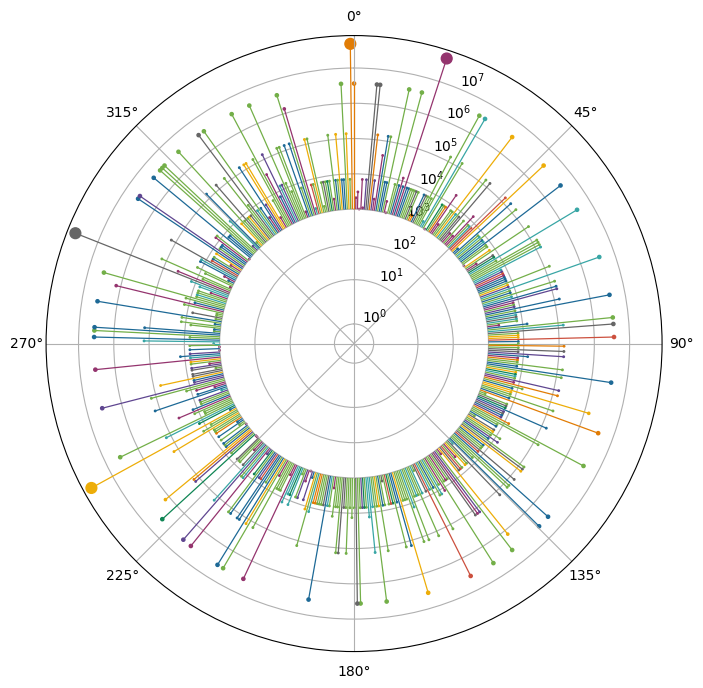

In [54]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_rscale('symlog')
ax.set_theta_offset(np.pi / 2)

# 시계반대방향
ax.set_theta_direction(-1)
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS)

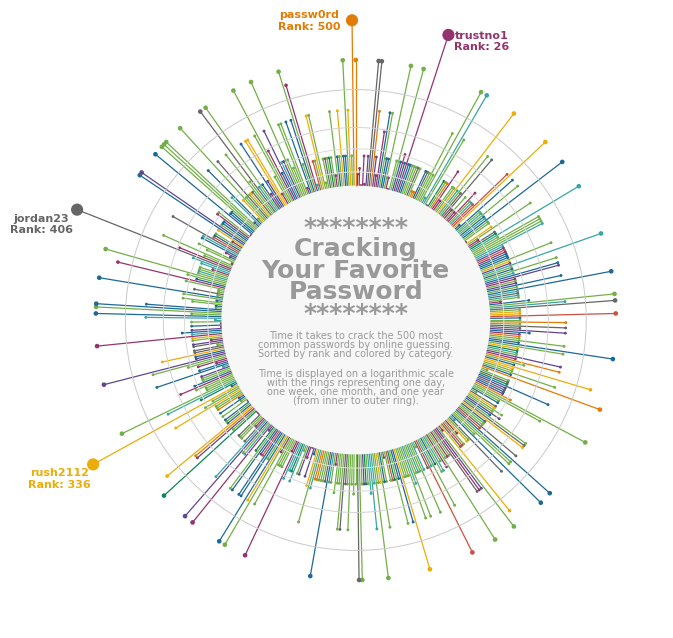

In [55]:
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])

# 1일 1주일 1달 1년을 나타내는 원들
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 * 24 * 60 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(7 * 24 * 60 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(30 * 24 * 60 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(365 * 24 * 60 + PLUS, 200), color= GREY79, lw=0.7)

# 90이상인 애들 추가
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=8, weight="bold"
    )

# 원 안쪽 회색으로 채우기
ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)

# x,y = 0.5, 0.5는 원의 중심을 나타냄, text 위치할 곳을 정해야함
ax.text(
    x=0.5, y=0.58, s="********\nCracking\nYour Favorite\nPassword\n********",
    color=GREY60, va="center", ha="center", ma="center", 
    fontsize=18, fontweight="bold", linespacing=0.87, transform=ax.transAxes
)

ax.text(
    x=0.5, y=0.46, s="Time it takes to crack the 500 most\ncommon passwords by online guessing.\nSorted by rank and colored by category.",
    color=GREY60, va="center", ha="center",  ma="center", 
    fontsize=7, linespacing=0.87, transform=ax.transAxes
)

ax.text(
    x=0.5, y=0.39, s="Time is displayed on a logarithmic scale\nwith the rings representing one day,\none week, one month, and one year\n(from inner to outer ring).",
    color=GREY60, va="center", ha="center",  ma="center", 
    fontsize=7, linespacing=0.87, transform=ax.transAxes
)

fig